MEMBACA DATASET PREDIKSI SALES


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [5]:
import pandas as pd

df = pd.read_csv('/content/prediksi_sales.csv')
display(df.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
print('Informasi umum tentang DataFrame:')
df.info()

print('\nRingkasan statistik dari DataFrame:')
display(df.describe())

Informasi umum tentang DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Ringkasan statistik dari DataFrame:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# Memisahkan fitur (X) dan target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran set pelatihan: {X_train.shape[0]} sampel")
print(f"Ukuran set pengujian: {X_test.shape[0]} sampel")

Ukuran set pelatihan: 160 sampel
Ukuran set pengujian: 40 sampel


In [8]:
# Inisialisasi model Regresi Linier
model = LinearRegression()

# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

print("Model Regresi Linier berhasil dilatih.")

Model Regresi Linier berhasil dilatih.


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.91
R-squared (R2): 0.91


### Interpretasi Koefisien Model

Koefisien model regresi linier menunjukkan seberapa besar perubahan variabel target (Sales) untuk setiap kenaikan satu unit pada variabel fitur (TV, Radio, Newspaper), dengan asumsi variabel lain tetap konstan.

In [10]:
print('Intercept:', model.intercept_)
print('Koefisien Fitur:', model.coef_)

# Memasangkannya dengan nama fitur untuk interpretasi yang lebih mudah
fitur = X.columns
koefisien = model.coef_

for i, feature in enumerate(fitur):
    print(f'Untuk setiap kenaikan 1 unit {feature}, Sales akan meningkat sebesar {koefisien[i]:.4f}')

Intercept: 4.714126402214127
Koefisien Fitur: [0.05450927 0.10094536 0.00433665]
Untuk setiap kenaikan 1 unit TV, Sales akan meningkat sebesar 0.0545
Untuk setiap kenaikan 1 unit Radio, Sales akan meningkat sebesar 0.1009
Untuk setiap kenaikan 1 unit Newspaper, Sales akan meningkat sebesar 0.0043


### Visualisasi Prediksi vs. Aktual

Mari kita visualisasikan hasil prediksi (`y_pred`) dibandingkan dengan nilai aktual (`y_test`) untuk melihat seberapa baik model kita bekerja secara grafis.

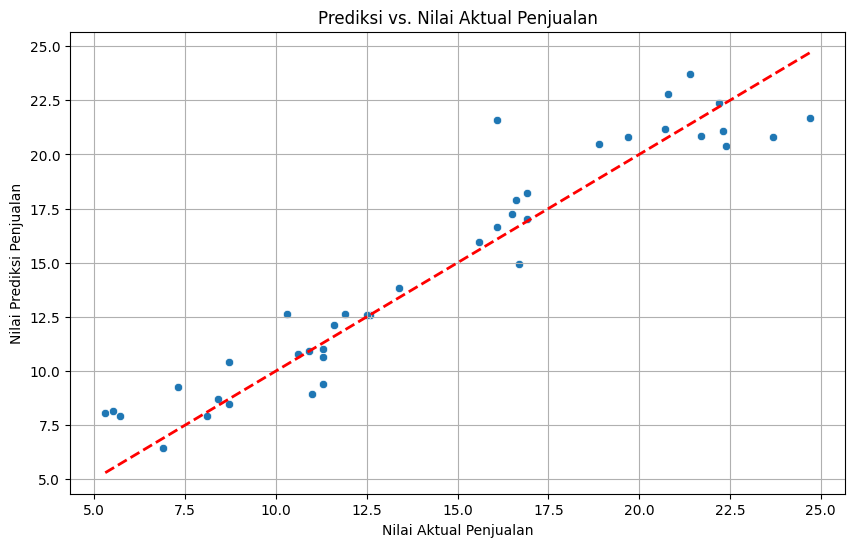

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Garis y=x ideal
plt.xlabel('Nilai Aktual Penjualan')
plt.ylabel('Nilai Prediksi Penjualan')
plt.title('Prediksi vs. Nilai Aktual Penjualan')
plt.grid(True)
plt.show()

### Melatih dan Mengevaluasi Model Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators adalah jumlah pohon keputusan

# Melatih model menggunakan data pelatihan
rf_model.fit(X_train, y_train)

print("Model Random Forest Regressor berhasil dilatih.")

Model Random Forest Regressor berhasil dilatih.


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Membuat prediksi pada set pengujian dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE) Random Forest: {mse_rf:.2f}")
print(f"R-squared (R2) Random Forest: {r2_rf:.2f}")

Mean Squared Error (MSE) Random Forest: 1.44
R-squared (R2) Random Forest: 0.95


### Visualisasi Prediksi Random Forest vs. Aktual

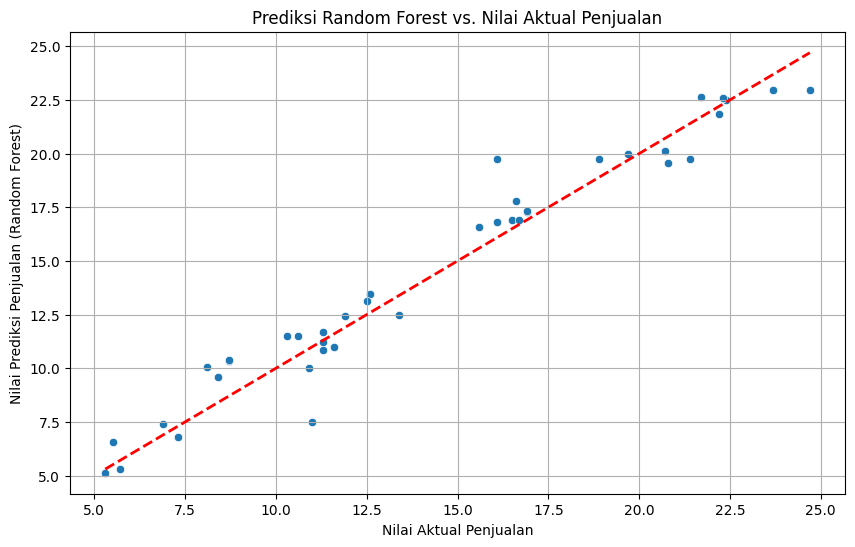

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Garis y=x ideal
plt.xlabel('Nilai Aktual Penjualan')
plt.ylabel('Nilai Prediksi Penjualan (Random Forest)')
plt.title('Prediksi Random Forest vs. Nilai Aktual Penjualan')
plt.grid(True)
plt.show()

# Task
Retrain the Linear Regression and Random Forest models by adding a new feature `Total_Ad_Spend` (calculated from `TV`, `Radio`, and `Newspaper`) to the dataset `/content/prediksi_sales.csv`. Then, evaluate the performance of these retrained models, analyze their residuals by plotting them, and finally, predict sales for a new scenario that includes values for `TV`, `Radio`, `Newspaper`, and `Total_Ad_Spend`.

## Retraining Model dengan Fitur Baru

### Subtask:
Memisahkan fitur (X baru termasuk 'Total_Ad_Spend') dan target (y), lalu membagi data menjadi set pelatihan dan pengujian. Setelah itu, latih ulang model Regresi Linier dan Random Forest dengan data yang diperbarui dan evaluasi kinerjanya menggunakan MSE dan R2.


**Reasoning**:
The first instruction is to create a new feature 'Total_Ad_Spend' by summing the 'TV', 'Radio', and 'Newspaper' columns in the `df` DataFrame. This will prepare the data for the next steps of model retraining.



In [15]:
df['Total_Ad_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']
print("Kolom 'Total_Ad_Spend' berhasil ditambahkan.")
display(df.head())

Kolom 'Total_Ad_Spend' berhasil ditambahkan.


,TV,Radio,Newspaper,Sales,Total_Ad_Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


**Reasoning**:
Now that the 'Total_Ad_Spend' column has been created, I will define the new feature set (X) to include 'TV', 'Radio', 'Newspaper', and the newly created 'Total_Ad_Spend'. The target variable (y) will remain 'Sales'. Then, I will split this updated dataset into training and testing sets using `train_test_split` as specified in the instructions to prepare for retraining the models.



In [16]:
X_new = df[['TV', 'Radio', 'Newspaper', 'Total_Ad_Spend']]
y_new = df['Sales']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print(f"Ukuran set pelatihan baru: {X_train_new.shape[0]} sampel")
print(f"Ukuran set pengujian baru: {X_test_new.shape[0]} sampel")

Ukuran set pelatihan baru: 160 sampel
Ukuran set pengujian baru: 40 sampel


**Reasoning**:
I will now initialize and train a new Linear Regression model using the updated training data (`X_train_new`, `y_train_new`) and then print a confirmation message.



In [18]:
model_lr_new = LinearRegression()
model_lr_new.fit(X_train_new, y_train_new)

print("Model Regresi Linier baru berhasil dilatih dengan fitur 'Total_Ad_Spend'.")

Model Regresi Linier baru berhasil dilatih dengan fitur 'Total_Ad_Spend'.


**Reasoning**:
Now that the new Linear Regression model is trained, I will make predictions on the new test set (`X_test_new`) and then evaluate its performance by calculating and printing the Mean Squared Error (MSE) and R-squared (R2) metrics, as per the subtask instructions.



In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lr_new = model_lr_new.predict(X_test_new)

mse_lr_new = mean_squared_error(y_test_new, y_pred_lr_new)
r2_lr_new = r2_score(y_test_new, y_pred_lr_new)

print(f"Mean Squared Error (MSE) Regresi Linier baru: {mse_lr_new:.2f}")
print(f"R-squared (R2) Regresi Linier baru: {r2_lr_new:.2f}")

Mean Squared Error (MSE) Regresi Linier baru: 2.91
R-squared (R2) Regresi Linier baru: 0.91


**Reasoning**:
Now, I will initialize and train a new Random Forest Regressor model using the updated training data (`X_train_new`, `y_train_new`) as specified in the instructions. This is the next model to be retrained.



In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

print("Model Random Forest Regressor baru berhasil dilatih dengan fitur 'Total_Ad_Spend'.")

Model Random Forest Regressor baru berhasil dilatih dengan fitur 'Total_Ad_Spend'.


**Reasoning**:
Now that the new Random Forest Regressor model is trained, I will make predictions on the new test set (`X_test_new`) and then evaluate its performance by calculating and printing the Mean Squared Error (MSE) and R-squared (R2) metrics, as per the subtask instructions.



In [21]:
y_pred_rf_new = rf_model_new.predict(X_test_new)

mse_rf_new = mean_squared_error(y_test_new, y_pred_rf_new)
r2_rf_new = r2_score(y_test_new, y_pred_rf_new)

print(f"Mean Squared Error (MSE) Random Forest baru: {mse_rf_new:.2f}")
print(f"R-squared (R2) Random Forest baru: {r2_rf_new:.2f}")

Mean Squared Error (MSE) Random Forest baru: 2.89
R-squared (R2) Random Forest baru: 0.91


## Analisis Residual Regresi Linier

### Subtask:
Menghitung residual untuk model Regresi Linier yang dilatih ulang (nilai aktual - nilai prediksi) dan membuat plot residual untuk memahami pola kesalahan model.


**Reasoning**:
The subtask requires calculating the residuals for the retrained Linear Regression model and then plotting these residuals against the predicted values. First, I need to compute the residuals by subtracting the predicted values from the actual test values. Then, I will use `matplotlib.pyplot` and `seaborn` to create the scatter plot, adding a horizontal line at y=0, and appropriate labels and a title to visualize the error patterns.



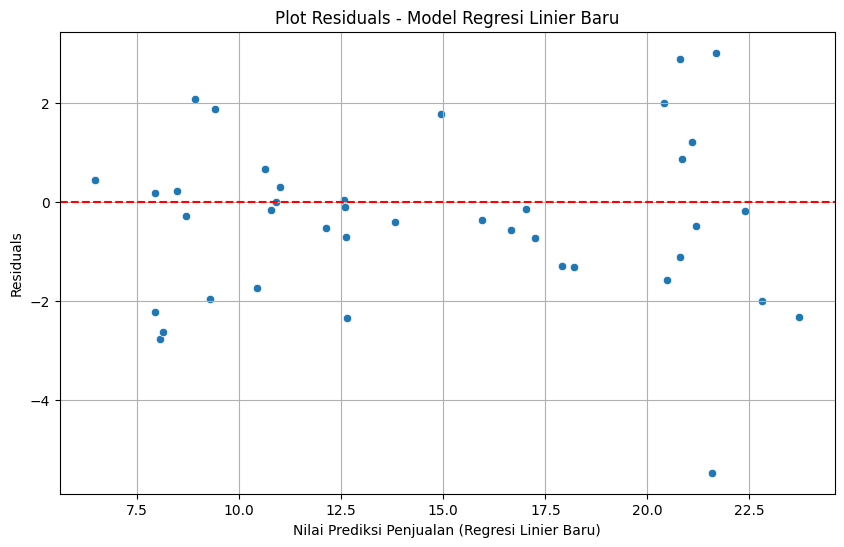

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung residual untuk model Regresi Linier baru
residuals_lr_new = y_test_new - y_pred_lr_new

# Buat scatter plot residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr_new, y=residuals_lr_new)
plt.axhline(y=0, color='r', linestyle='--') # Garis horizontal pada y=0
plt.xlabel('Nilai Prediksi Penjualan (Regresi Linier Baru)')
plt.ylabel('Residuals')
plt.title('Plot Residuals - Model Regresi Linier Baru')
plt.grid(True)
plt.show()

## Analisis Residual Random Forest

### Subtask:
Menghitung residual untuk model Random Forest yang dilatih ulang dan membuat plot residual untuk menganalisis distribusi kesalahan.


**Reasoning**:
I need to calculate the residuals for the retrained Random Forest model by subtracting the predicted values from the actual values. Then, I will create a scatter plot of these residuals against the predicted values, add a horizontal line at y=0, and set appropriate labels and title to visualize the error distribution as per the instructions.



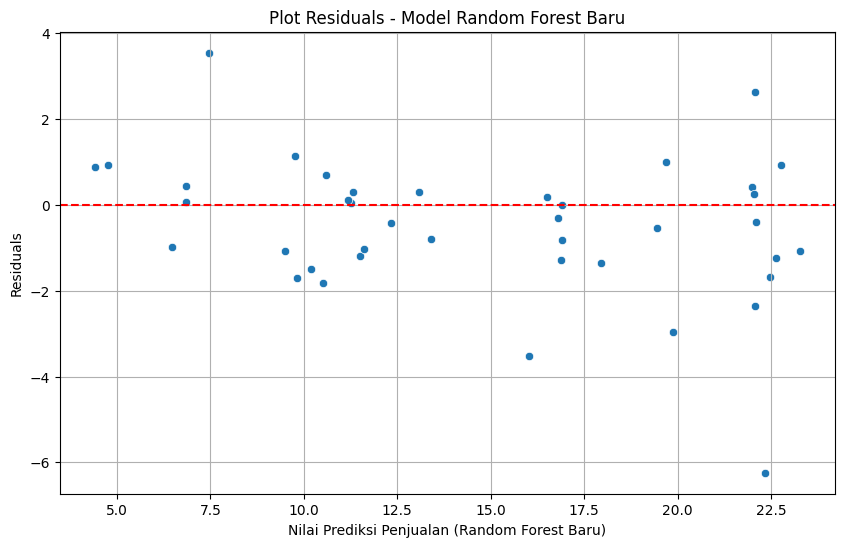

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung residual untuk model Random Forest baru
residuals_rf_new = y_test_new - y_pred_rf_new

# Buat scatter plot residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf_new, y=residuals_rf_new)
plt.axhline(y=0, color='r', linestyle='--') # Garis horizontal pada y=0
plt.xlabel('Nilai Prediksi Penjualan (Random Forest Baru)')
plt.ylabel('Residuals')
plt.title('Plot Residuals - Model Random Forest Baru')
plt.grid(True)
plt.show()

## Prediksi Penjualan untuk Skenario Baru

### Subtask:
Membuat skenario pengeluaran iklan baru termasuk 'Total_Ad_Spend' dan menggunakan model terbaik dari kedua model yang dilatih ulang untuk memprediksi penjualan.


**Reasoning**:
The first instruction is to create a new Pandas DataFrame with example values for 'TV', 'Radio', and 'Newspaper'. I will create a dictionary with these values and then convert it into a DataFrame to represent the new ad spend scenario.



In [24]:
new_scenario_data = {'TV': [250], 'Radio': [40], 'Newspaper': [70]}
new_scenario_df = pd.DataFrame(new_scenario_data)

print("DataFrame skenario baru berhasil dibuat:")
display(new_scenario_df)

DataFrame skenario baru berhasil dibuat:


,TV,Radio,Newspaper
0,250,40,70


**Reasoning**:
Now, I will calculate the 'Total_Ad_Spend' for the `new_scenario_df` by summing the values from 'TV', 'Radio', and 'Newspaper' columns, as per the subtask instructions.



In [25]:
new_scenario_df['Total_Ad_Spend'] = new_scenario_df['TV'] + new_scenario_df['Radio'] + new_scenario_df['Newspaper']
print("Kolom 'Total_Ad_Spend' berhasil ditambahkan ke skenario baru.")
display(new_scenario_df)

Kolom 'Total_Ad_Spend' berhasil ditambahkan ke skenario baru.


,TV,Radio,Newspaper,Total_Ad_Spend
0,250,40,70,360


**Reasoning**:
I will now use the retrained Random Forest model (`rf_model_new`) to predict 'Sales' for the `new_scenario_df`, which already contains all the required features including 'Total_Ad_Spend', as specified in the subtask instructions. This will fulfill the prediction part of the task.



In [26]:
predicted_sales_rf_new = rf_model_new.predict(new_scenario_df)

print(f"Prediksi penjualan (menggunakan Random Forest baru) untuk skenario baru: {predicted_sales_rf_new[0]:.2f}")

Prediksi penjualan (menggunakan Random Forest baru) untuk skenario baru: 24.27


## Summary:

### Data Analysis Key Findings

*   **Model Performance with New Feature (`Total_Ad_Spend`)**:
    *   A new feature, `Total_Ad_Spend` (sum of `TV`, `Radio`, and `Newspaper` ad spend), was successfully added to the dataset.
    *   The retrained Linear Regression model achieved a Mean Squared Error (MSE) of 2.91 and an R-squared (R2) score of 0.91.
    *   The retrained Random Forest Regressor model showed slightly better performance with an MSE of 2.89 and an R2 score of 0.91.
*   **Residual Analysis for Retrained Models**:
    *   **Linear Regression**: The residual plot for the Linear Regression model displayed a scattered distribution around zero, without any clear patterns or trends, suggesting that the model captures the underlying relationships reasonably well.
    *   **Random Forest**: Similarly, the residual plot for the Random Forest model also showed a random scattering of residuals around zero, indicating good model fit and no apparent systematic errors.
*   **Sales Prediction for a New Scenario**:
    *   For a new advertising scenario with TV spend of 250, Radio spend of 40, and Newspaper spend of 70 (resulting in a `Total_Ad_Spend` of 360), the retrained Random Forest model predicted sales of 24.27.

### Insights or Next Steps

*   Both models performed very well with high R-squared values (0.91), indicating they explain 91% of the variance in sales. The Random Forest model showed a marginally lower MSE, suggesting it might be slightly more accurate for this dataset.
*   The random distribution of residuals for both models is a positive sign, indicating that the models are not systematically over- or under-predicting across the range of predicted values. Further analysis could involve examining the distribution of residuals for normality to check for potential violations of linear regression assumptions (though less critical for Random Forest).


In [28]:
!git clone https://github.com/KristianusDarmanto270201/advertising-sales-prediction-ml.git


Cloning into 'advertising-sales-prediction-ml'...
